In [1]:
# dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
from sklearn import metrics

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [5]:
# import the data
data = pd.read_csv('data.csv')

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
# dropping some of the unwanted varibles

data['diagnosis']=data['diagnosis'].map({'M':1, 'B':0})

In [12]:
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed:32', axis=1,inplace=True)

In [13]:
data_scaled = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))

In [14]:
data_scaled.columns = list(data.iloc[:,1:32].columns)

In [15]:
data_scaled['diagnosis'] = data['diagnosis']

In [16]:
data_scaled['texture_mean'].mean()

1.0497363572026963e-16

In [17]:
data_scaled['texture_mean'].std()

1.000879894582903

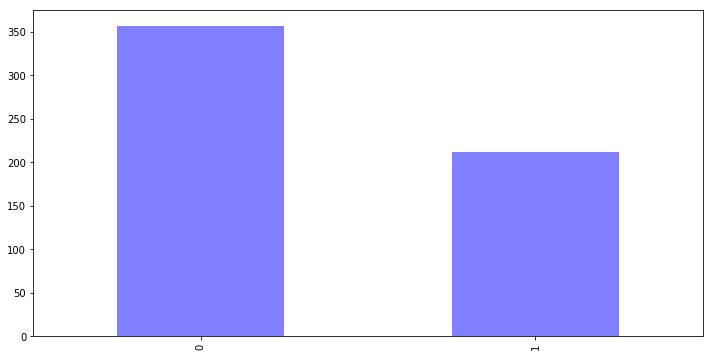

In [62]:
# looking at number of patient with Malingnant and Bening Tumors
data_scaled.diagnosis.value_counts().plot(kind='bar',alpha=0.5,facecolor='b',figsize=(12,6))
# plt.title('Diagnosis') (M=1, B=0), fontsize =1 )
plt.figure()

In [20]:
data_scaled.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [21]:
data_mean_list = [ x for x in data_scaled.columns if 'mean' in x]

In [22]:
data_mean = data_scaled[data_mean_list]

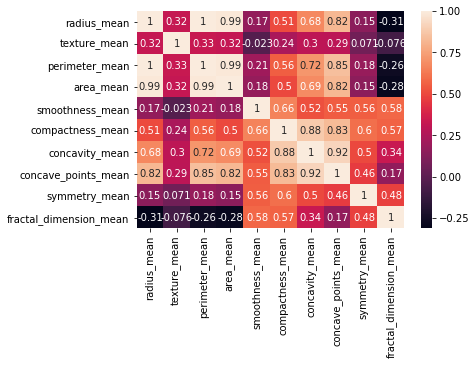

In [23]:
foo = sns.heatmap(data_mean.corr(), vmax=1, annot=True)
# o foo = sns.heatmap(data_mean.corr(), vmax=1,square=True,  annot=True)

In [24]:
data_drop_list = ['radius_mean', 'perimeter_mean', 'concave_points_mean']
data_mean.drop(data_drop_list, axis=1, inplace=True)

/home/winta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
data_mean.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.217515,2.255747
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.001392,-0.868652
2,0.456187,1.558884,0.942210,1.052926,1.363478,0.939685,-0.398008
3,0.253732,-0.764464,3.283553,3.402909,1.915897,2.867383,4.910919
4,-1.151816,1.826229,0.280372,0.539340,1.371011,-0.009560,-0.562450


In [52]:
x_train,x_test, y_train, y_test = train_test_split(data_mean,data_scaled['diagnosis'], test_size=0.2, random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier()
scores=cross_val_score(knn, x_train,y_train, scoring='accuracy',cv=10).mean()

In [33]:
print("The mean accuracy with 10 fold cross validation for KNN is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation for KNN is 95.37


In [34]:
from  sklearn.ensemble import RandomForestClassifier

In [35]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x_train,y_train,scoring ="accuracy",cv=10).mean()

In [36]:
print("The mean accuracy with 10 fold cross validation for dt is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation for dt is 93.86


In [61]:
for ind in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=ind)
    score=cross_val_score(knn,x_train,y_train,scoring="accuracy", cv=10).mean()
    print("N=" +str(ind)+ ":score="+ str(round(score,2)))

N=1:score=0.92
N=2:score=0.93
N=3:score=0.94
N=4:score=0.95
N=5:score=0.95
N=6:score=0.95
N=7:score=0.95
N=8:score=0.94
N=9:score=0.94
N=10:score=0.94
N=11:score=0.94
N=12:score=0.94
N=13:score=0.94
N=14:score=0.94
N=15:score=0.94
N=16:score=0.94
N=17:score=0.94
N=18:score=0.94
N=19:score=0.94
N=20:score=0.94


In [56]:
rf=RandomForestClassifier(n_estimators=17)
rf.fit(x_train,y_train)
predicted=rf.predict(x_test)
acc_test=metrics.accuracy_score(y_test, predicted)


In [57]:
print("accuracy:%s"%(round(acc_test,2)))

accuracy:0.95


In [1]:
import pickle as pkl
pkl.dump(rf,open("model.pkl","wb"))

NameError: name 'rf' is not defined